# **<center> Análisis de Sentimientos de los candidatos presidenciales </br> Ecuador 2021, en la red social Twitter </center>**
<h6>
    <center> Miguel Angel Macias, Jonnathan Campoberde <br/> 
    <i>Universidad de Cuenca <br/>  <i>Facultad de Ingenieria - Escuela de Sistemas<br/> Cuenca, Ecuador</i>
    <br/> { mangel.maciasn, jonnathan.campoberde }@ucuenca.edu.ec</center>
<h6>

# **I.&emsp;Introducción**
El presente trabajo tiene como objetivo emplear de manera práctica todos los conocimientos adquiridos en el transcurso de la asignatura “Text Mining”. En este trabajo se realizó una limpieza de los datos, se removieron caracteres especiales, emojis y enlaces de los tweets recolectados; así también se realizó una inspección de posibles cuentas trolls que afecten el AS de las opiniones de usuarios a favor o en contra de un movimiento político. Luego del tratamiento y análisis de los tweets se entrenaron 3 modelos de clasificación de texto usando Support Vector Machine (SVM), Naive Bayes (NB) y Random Forest (RF) para posteriormente compararlos y elegir qué modelo presentó los mejores resultados. 
Los tweets que se recolectaron tratan acerca de los dos candidatos presidenciales que lideran las encuestas para las elecciones de Ecuador 2021. Los dos candidatos, Andrés Arauz y Guillermo Lasso, pertenecen a los dos movimientos políticos más dominantes del estado ecuatoriano.

## **1.1.&emsp;Objetivos del Proyecto**
>. El objetivo de este artículo es el AS de estos dos candidatos para luego contrastarlos con los resultados oficiales de las elecciones, así también, entrenar un modelo de clasificación de sentimientos de los tweets que se generen en redes sociales acerca de la política dentro del país. Posteriormente se desea responder a las siguientes preguntas de investigación definidas en 1.2.

## **1.2.&emsp;Preguntas de investigación**
>- RQ1:     ¿Qué tan preciso los datos de Twitter reflejan el sentimiento político en un proceso electoral?
>- RQ1:     ¿En qué grado de aceptación se encuentran los candidatos dentro de la red social Twitter?
>- RQ3:     ¿Los resultados oficiales son parecidos a los resultados encontrados en nuestro análisis? 


# **IV.&emsp;SENTIMENT ANALYSIS**

## **4.1.&emsp; Reading dataset**
>Para este paso...

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pytz

import numpy as np              # Para operaciones matematicas
import pandas as pd             # Manejo de datos / dataframes
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


#%matplotlib inline

In [2]:
data_raw = '../data/raw'              # directorio que contiene toda la data sin manipular
data_processed = '../data/processed'  # directorio que contiene data procesada

In [3]:
df_lasso_tag = pd.read_csv(data_processed+"/lasso_tag.csv")
df_lasso_tag['created_at'] = pd.to_datetime(df_lasso_tag['created_at'], utc=pytz.UTC)
df_lasso_tag['user.created_at'] = pd.to_datetime(df_lasso_tag['user.created_at'], utc=pytz.UTC)
df_lasso_tag

,created_at,favorite_count,full_text,id_str,metadata.iso_language_code,retweeted_status.created_at,retweeted_status.full_text,user.created_at,user.favourites_count,user.followers_count,user.friends_count,user.id_str,user.location,user.verified,retweet_count,is_troll,sentiment_tag,sentiment_sc
0,2021-01-24 18:48:13+00:00,0,se imaginan un gobierno de guillermo lasso con...,1353414316947550213,es,Sat Jan 23 23:24:31 +0000 2021,Se imaginan un gobierno de Guillermo Lasso con...,2020-01-05 21:38:08+00:00,22225,150,219,1213937693018607616,"Quito, Ecuador",False,409,False,Negativo,0.220347
1,2021-01-24 18:50:06+00:00,0,lenín moreno no gobernó con alianza pais lo hi...,1353414791684042757,es,Mon Jan 18 22:50:08 +0000 2021,"Lenín Moreno NO gobernó con Alianza PAIS, lo h...",2018-10-23 14:39:27+00:00,3027,228,1384,1054744113814429696,NaN,False,9,False,Positivo,0.741087
2,2021-01-24 18:51:16+00:00,0,mitomanía guillermo celi dice que mauricio rod...,1353415086837276673,es,Sun Jan 24 16:13:51 +0000 2021,MITOMANÍA\r\n\r\n▪︎ Guillermo Celi dice que Ma...,2012-09-21 14:11:58+00:00,109516,450,1024,837872970,"Queens, New York.",False,997,False,Positivo,0.579494
3,2021-01-24 18:52:20+00:00,0,carlos vera di la verdad así reciben a tu ídol...,1353415355914473472,es,Sun Jan 24 07:07:27 +0000 2021,"Carlos Vera Di la verdad, así reciben a tu ído...",2017-02-21 02:01:26+00:00,150546,821,591,833859141185712128,NaN,False,11,False,Negativo,0.240676
4,2021-01-24 18:53:02+00:00,0,ya entendí hervas subió foto d lasso y moreno ...,1353415532385452032,es,Sun Jan 24 16:14:54 +0000 2021,"Ya entendí, Hervas subió foto d Lasso y Moreno...",2010-12-08 20:25:30+00:00,11385,126,989,224364373,Ecuador,False,7,False,Negativo,0.104526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19109,2021-02-13 23:44:30+00:00,0,no ven a guillermo lasso y piensan automáticam...,1360736636594778120,es,NaN,NaN,2009-09-27 20:37:35+00:00,3838,534,2061,77825696,Mystic Falls - Forks,False,0,False,Negativo,0.074857
19110,2021-02-13 23:45:35+00:00,0,equipo de campaña de guillermo lasso,1360736912328323074,es,NaN,NaN,2011-03-08 01:40:40+00:00,1608,147,386,262437024,"Marbella, España",False,0,False,Positivo,0.749297
19111,2021-02-13 23:48:35+00:00,0,y la compra de los cdrs ya estamos grandecitos...,1360737664132087814,es,NaN,NaN,2016-02-13 10:05:41+00:00,123,11,206,4904188833,NaN,False,0,False,Negativo,0.029446
19112,2021-02-13 23:56:25+00:00,0,pero vive libre también le respondió guillermo...,1360739636327415815,es,NaN,NaN,2013-11-19 03:45:14+00:00,1642,31,69,2202430368,NaN,False,0,False,Neutral,0.526554


## **4.2.&emsp; Exploratory Data Analysis**
>Para este paso...

In [4]:
#!pip install seaborn --upgrade

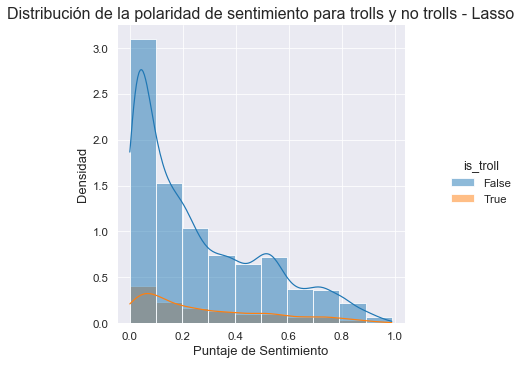

In [5]:
sns.set_style('darkgrid')
sns.set_context("paper", font_scale=1.3)

plt.figure(figsize=(12, 9))
g = sns.displot(df_lasso_tag, x="sentiment_sc", bins=10,
                hue="is_troll", stat="density", kde=True)
plt.title('Distribución de la polaridad de sentimiento para trolls y no trolls - Lasso', fontsize=16)
plt.ylabel("Densidad", fontsize=13)
plt.xlabel("Puntaje de Sentimiento", fontsize=13)
plt.close(1)
plt.show()

#### _Null Data Analysis_
> Los datos nulos que se muestran a continuacion se deben a que no fueron "retwiteados", es decir, `13396` son tweets originales a secas que no fueron respondidos por nadie

In [6]:
df_lasso_tag.isnull().sum().reset_index().rename(columns={'index':'columna', 0:'datos nulos'}).style

,columna,datos nulos
0,created_at,0
1,favorite_count,0
2,full_text,0
3,id_str,0
4,metadata.iso_language_code,0
5,retweeted_status.created_at,13396
6,retweeted_status.full_text,13396
7,user.created_at,0
8,user.favourites_count,0
9,user.followers_count,0


In [7]:
def larger_axlim( axlim ):
    """ argument axlim expects 2-tuple 
        returns slightly larger 2-tuple """
    axmin,axmax = axlim
    axrng = axmax - axmin
    new_min = axmin
    new_max = axmax + 0.05 * axrng
    return new_min,new_max

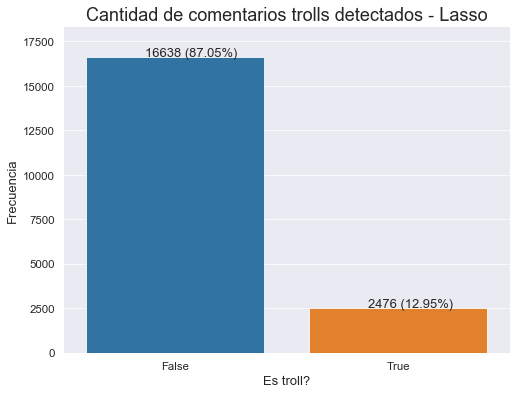

In [8]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="is_troll", data=df_lasso_tag)
plt.title('Cantidad de comentarios trolls detectados - Lasso', fontsize=18)
plt.ylabel('Frecuencia', fontsize=13)
plt.xlabel('Es troll?', fontsize=13)

totalsize = df_lasso_tag['is_troll'].value_counts().sum()
ax.set_ylim(larger_axlim( ax.get_ylim()))

for p in ax.patches:
        ax.text(p.xy[0] + p.get_width()/3, p.xy[1] + p.get_height()+50, 
                str(round(p.get_height(), 3)) + " (" + 
                str(round(p.get_height()/totalsize*100,2)) + "%)", fontsize=13) 

plt.show();

#### _Ok_

## **4.3.&emsp; Positive/Negative/Neutral Sentiment Analysis**
>Para este paso...

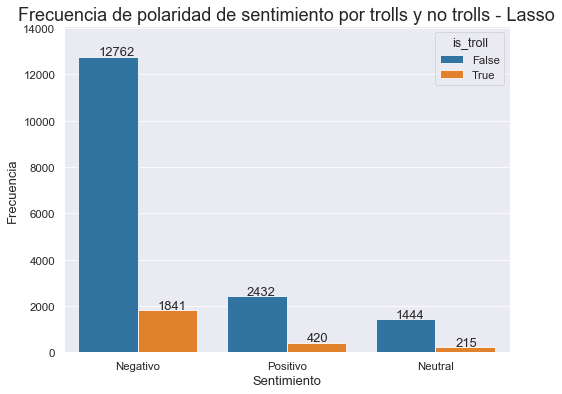

In [9]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x="sentiment_tag", hue="is_troll", data=df_lasso_tag)

plt.title('Frecuencia de polaridad de sentimiento por trolls y no trolls - Lasso', fontsize=18)
plt.ylabel('Frecuencia', fontsize=13)
plt.xlabel('Sentimiento', fontsize=13)

ax.set_ylim(larger_axlim( ax.get_ylim()))

for p in ax.patches:
        ax.text(p.xy[0] + p.get_width()/3, p.xy[1] + p.get_height()+50, 
                str(round(p.get_height(), 3)), fontsize=13) 

plt.show();

In [10]:
# Discarting trolls
lasso = df_lasso_tag[df_lasso_tag["is_troll"]==False].resample('3H', 
                                                               on='created_at', 
                                                               offset='00Min00s').sentiment_sc.mean()
lasso_time_series = pd.DataFrame({'created_at':lasso.index, 'sentiment_sc':lasso.values})
mean_lasso = lasso_time_series['sentiment_sc'].mean()

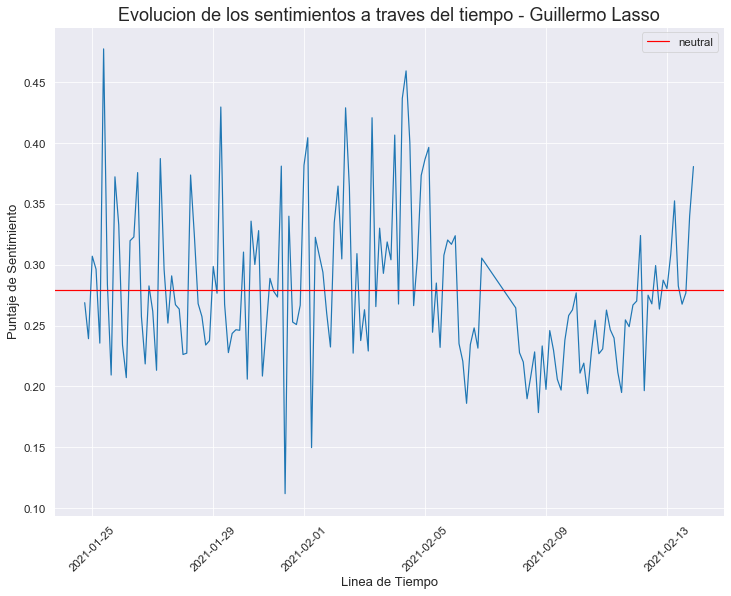

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 9))
ax = sns.lineplot(x="created_at", y="sentiment_sc", estimator='mean', data=lasso_time_series)
plt.title('Evolucion de los sentimientos a traves del tiempo - Guillermo Lasso', fontsize=18)
plt.ylabel('Puntaje de Sentimiento', fontsize=13)
plt.xlabel('Linea de Tiempo', fontsize=13)
plt.xticks(rotation=45)
ax.axhline(mean_lasso,color='red',label='neutral')
ax.legend()
plt.show()

#### _Ahora se procede a realizar el mismo analisis por semanas_

In [12]:
lasso_time_series.set_index(lasso_time_series['created_at'], inplace=True)

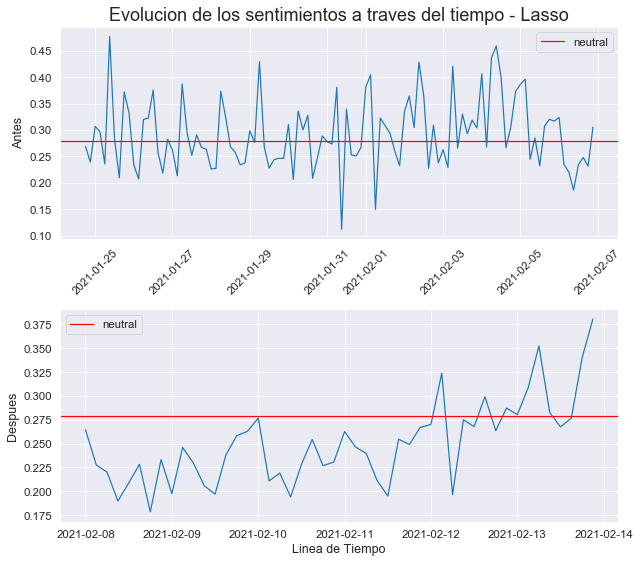

In [13]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(9,8))

sns.lineplot(x="created_at", y="sentiment_sc", estimator='mean', 
                  data=lasso_time_series['2021-01-24':'2021-02-6'], ax=ax1)
ax1.set_title('Evolucion de los sentimientos a traves del tiempo - Lasso', fontsize=18)
ax1.set_xlabel("")  # remove y label, but keep ticks
ax1.set_ylabel("Antes")
ax1.axhline(mean_lasso,color='red',label='neutral')
ax1.legend()

sns.lineplot(x="created_at", y="sentiment_sc", estimator='mean', 
                  data=lasso_time_series['2021-02-8':'2021-02-13'], ax=ax3)
ax3.set_xlabel("Linea de Tiempo") 
ax3.set_ylabel("Despues")
ax3.axhline(mean_lasso, color='red',label='neutral')
ax3.legend()

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
fig.tight_layout()
plt.show()

## **4.3.&emsp; Analisis de Nube de Palabras**
>Para este paso...

In [14]:
def stopword_removal(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [15]:
stopwords_ = stopwords.words('spanish')
STOPWORDS = set(stopwords_)
df_lasso_tag["full_text"] = df_lasso_tag["full_text"].apply(stopword_removal)

Sentiment: Positivo


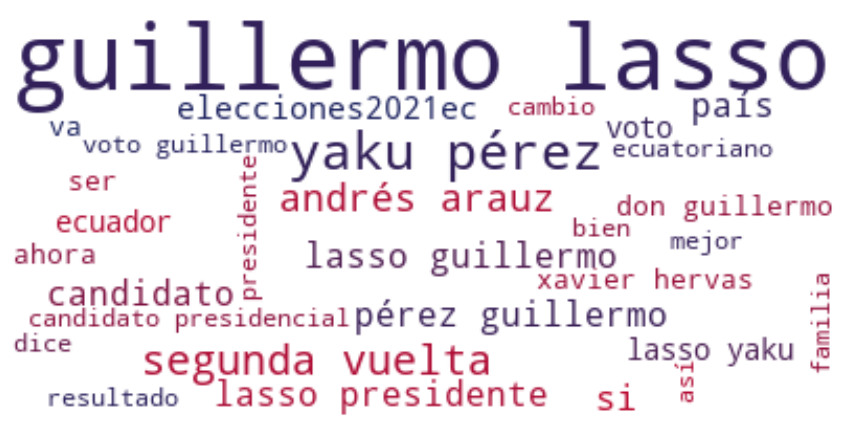

Sentiment: Negativo


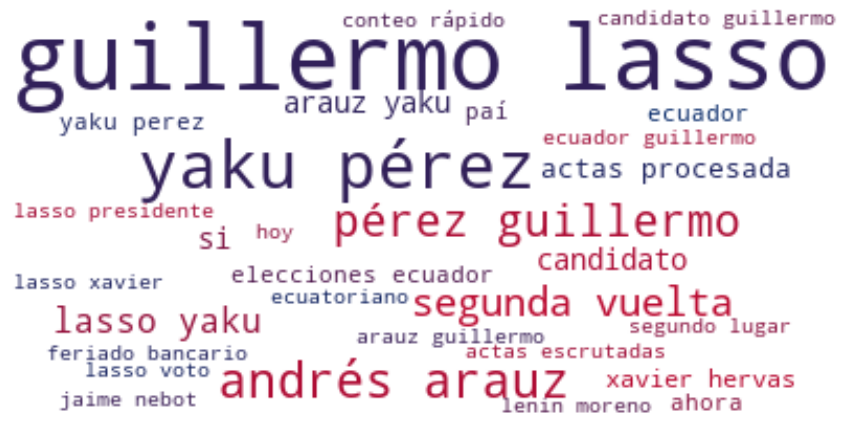

In [16]:
lasso_mask = np.array(Image.open('../src/rafita.png'))

result = df_lasso_tag[df_lasso_tag['is_troll']==False][['full_text', 'sentiment_tag']]

colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


for sent in ['Positivo', 'Negativo']:
    s=result[result.sentiment_tag==sent]
    text=s['full_text'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=70, max_words=30, random_state=42,
                          collocations=True, colormap=cmap, background_color="white").generate(text)
    
    print('Sentiment: {}'.format(sent))
    
    plt.figure(figsize=(15,15) )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()